## DATA SET Analysis: 
### - traffic data overview - source, 
### - date :year, month, weekday analysis

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
# import filtered US 2017-2019 data
path="../data/YK_TX2017-19_Accidents.csv"
traffic_df=pd.read_csv(path,index_col='Unnamed: 0')
traffic_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
1,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
2,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
3,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
4,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2017


## Count of data by column

In [8]:
traffic_df.count()

ID                       248298
Source                   248298
TMC                      218211
Severity                 248298
Start_Time               248298
End_Time                 248298
Start_Lat                248298
Start_Lng                248298
End_Lat                   30087
End_Lng                   30087
Distance(mi)             248298
Description              248297
Number                   102133
Street                   248298
Side                     248298
City                     248298
County                   248298
State                    248298
Zipcode                  248298
Country                  248298
Timezone                 248273
Airport_Code             248273
Weather_Timestamp        243952
Temperature(F)           242990
Wind_Chill(F)             75674
Humidity(%)              242742
Pressure(in)             243252
Visibility(mi)           242400
Wind_Direction           243631
Wind_Speed(mph)          219533
Precipitation(in)         73965
Weather_

## Data source analysis by year 

In [9]:
source_df=traffic_df.groupby(['Year','Source']).agg({'ID':'count'}).unstack('Source') # unstacking so we can plot easily
source_df

ID                       
Source   Bing MapQuest MapQuest-Bing
Year                                
2017    13129    71880           531
2018    10221    73233           595
2019     6737    71804           168

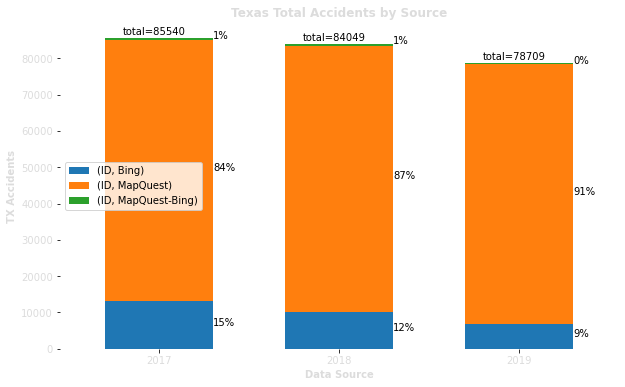

In [50]:
# setting up bar plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
 
plot_ser=source_df # data for plot
# plot
plot1=plot_ser.plot.bar(rot=0,width=0.6, stacked=True)

plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Data Source', fontweight="bold", color=color_t)
plt.ylabel('TX Accidents',fontweight='bold', color=color_t)
plt.title("Texas Total Accidents by Source", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# loop to anotate values on the plot
for i, r in plot_ser.iterrows():
#    off=50000
    d1=r[0]
    d2=r[1]
    d3=r[2]
    d=d1+d2+d3
    plt.text(i-2017+.3, y =d1/2 , s=f"{(d1/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+.3, y =d1+d2/2 , s=f"{(d2/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+0.3, y =d3+d1+d2 , s=f"{(d3/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017-0.2, y =d3+d1+d2+1000 , s=f"total={d}" , fontdict=dict(fontsize=10))
# Save chart as PNG
plot1.legend(loc='center left')
plt.savefig('../Analysis/output/YK_TX_accidents_source_bar.png', facecolor='dimgray')

In [ ]:
## Data ditribution by State by year 

In [13]:
county_df=traffic_df.groupby(['County','Year']).agg({'ID':'count'}).unstack('Year') # unstacking so we can plot easily
county_df

ID            
Year       2017  2018  2019
County                     
Anderson    6.0   3.0   1.0
Andrews     4.0   NaN   NaN
Angelina   27.0  22.0  26.0
Archer      1.0   8.0   3.0
Armstrong   2.0   NaN   NaN
...         ...   ...   ...
Winkler     NaN   2.0   NaN
Wise        1.0   3.0   3.0
Wood        1.0   NaN   3.0
Yoakum      2.0   4.0   NaN
Young       1.0   NaN   1.0

[212 rows x 3 columns]

In [15]:
# traffic_df.columns # debug print

In [16]:
traffic_df['Start_Time'][0]

'2017-01-02 14:40:12'

In [17]:
date_df=pd.DataFrame()
date_df['date_time_obj']=pd.to_datetime(traffic_df['Start_Time'])

In [77]:
date_df['Date']=date_df['date_time_obj'].dt.date
traffic_df['Date']=date_df['Date']

In [19]:
date_df['Year']=date_df['date_time_obj'].dt. year

In [20]:
date_df['Month']=date_df['date_time_obj'].dt. month

In [92]:
date_df['Weekday']=date_df['date_time_obj'].dt.weekday
traffic_df['Weekday']=date_df['Weekday']

In [22]:
date_df['Severity']=traffic_df['Severity']

In [23]:
date_df['ID']=traffic_df['ID']

In [24]:
date_df

,date_time_obj,Date,Year,Month,Weekday,Severity,ID
0,2017-01-02 14:40:12,2017-01-02,2017,1,0,2,A-267712
1,2017-01-02 14:28:48,2017-01-02,2017,1,0,2,A-267713
2,2017-01-02 14:04:17,2017-01-02,2017,1,0,2,A-267714
3,2017-01-02 14:29:13,2017-01-02,2017,1,0,2,A-267715
4,2017-01-02 14:40:51,2017-01-02,2017,1,0,2,A-267716
...,...,...,...,...,...,...,...
248293,2019-08-23 13:16:19,2019-08-23,2019,8,4,2,A-3513513
248294,2019-08-23 13:04:19,2019-08-23,2019,8,4,3,A-3513514
248295,2019-08-23 13:00:34,2019-08-23,2019,8,4,3,A-3513515
248296,2019-08-23 16:44:23,2019-08-23,2019,8,4,3,A-3513517


In [25]:
year_rate=date_df.groupby(['Year','Month']).agg({'Date':'count'})
year_rate

Date
Year Month      
2017 1      8699
     2      7188
     3      8610
     4      7483
     5      5678
     6      6336
     7      5736
     8      7800
     9      7091
     10     7279
     11     6616
     12     7024
2018 1      6637
     2      7764
     3      7257
     4      7051
     5      7067
     6      6400
     7      5871
     8      6948
     9      6587
     10     7899
     11     7557
     12     7011
2019 1      6753
     2      6035
     3      5496
     4      6725
     5      6533
     6      5765
     7      6397
     8      7291
     9      6733
     10     8138
     11     6770
     12     6073

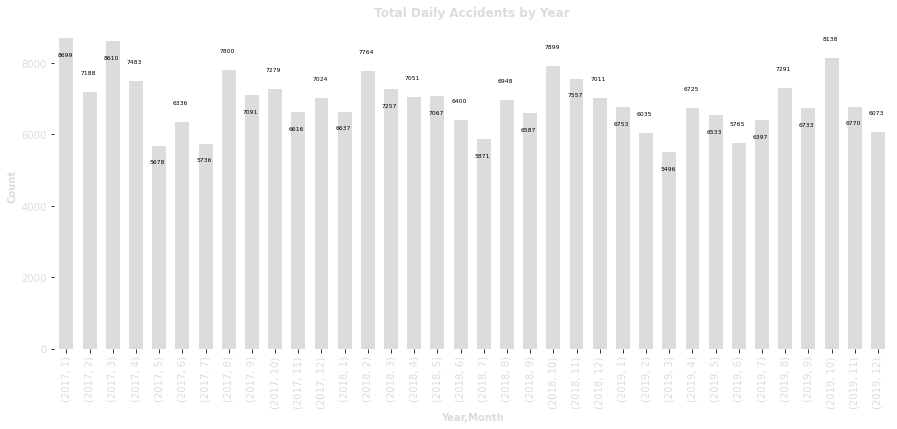

In [31]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plot5= plt.subplot(111)
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Year', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.title("Total Daily Accidents by Year", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plot_ser=year_rate['Date']
plot5=plot_ser.plot.bar(rot=90,color=color_t,width=0.6)
for i,d in enumerate(plot_ser):
    if i%2==0:
        off=500
    else:
        off=-500
    plt.text(x=i-.4 , y =d-off , s=f"{d}" , fontdict=dict(fontsize=6))
plt.ylabel('Count')    
plt.savefig('../Analysis/output/YK_TX_accidents_monthYear_bar.png', facecolor='dimgray')


In [232]:
#date_df.drop(date_df.loc[date_df['Year']==2017].index)
#date_df=date_df[date_df['Year']!=2017]

In [29]:
month_rate=date_df.groupby(['Month']).agg({'Date':'count'})

In [30]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

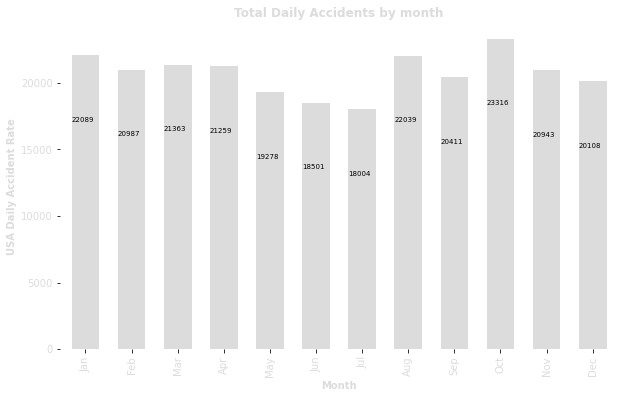

In [32]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x=month_rate.index
y=month_rate['Date']
plot5=month_rate['Date'].plot.bar(rot=90,color=color_t,width=0.6)
plt.title("Total Daily Accidents by month", fontweight="bold", color=color_t)    
plt.xlabel('Month', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,12),months, color=color_t,fontsize=10)
for i,d in enumerate(month_rate['Date']):
    plt.text(x=i-.3 , y =d-5000 , s=f"{d}" , fontdict=dict(fontsize=7))
plt.savefig('../Analysis/output/YK_TX_accidents_month_bar.png', facecolor='dimgray')

In [33]:
weekday_rate=date_df.groupby(['Weekday']).agg({'Date':'count','Month':'mean'})
weekday_rate

,Date,Month
Weekday,,
0,44206,6.613152
1,46691,6.445910
2,46050,6.500282
3,44592,6.411957
4,46231,6.578292
5,11269,6.295501
6,9259,6.244735


In [34]:
daily_accidents={}
daily_stats=pd.DataFrame()
for i in range(0,7):
    daily_accidents[i]=date_df.loc[date_df['Weekday']==i].groupby(['Date']).agg({'Date':'count', 'Year':'mean','Month':'mean'})
    daily_stats[i]=daily_accidents[i].describe()['Date']

In [35]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
daily_stats

,0,1,2,3,4,5,6
count,157.000000,157.000000,156.000000,156.000000,156.000000,155.000000,156.000000
mean,281.566879,297.394904,295.192308,285.846154,296.352564,72.703226,59.352564
std,69.667091,68.385667,61.408008,70.971521,61.814165,36.622535,34.729332
min,19.000000,22.000000,51.000000,41.000000,35.000000,11.000000,4.000000
25%,243.000000,267.000000,262.750000,256.750000,258.000000,49.000000,38.000000
50%,287.000000,301.000000,296.000000,289.000000,299.500000,66.000000,50.500000
75%,330.000000,336.000000,330.500000,326.250000,336.250000,92.500000,70.000000
max,435.000000,450.000000,491.000000,445.000000,449.000000,233.000000,212.000000


In [36]:
daily_accidents[0]

,Date,Year,Month
Date,,,
2017-01-02,140,2017,1
2017-01-09,271,2017,1
2017-01-16,346,2017,1
2017-01-23,376,2017,1
2017-01-30,397,2017,1
...,...,...,...
2019-12-02,272,2019,12
2019-12-09,275,2019,12
2019-12-16,235,2019,12



 0  
 iqr= 87.0
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2017-05-29    23  2017      5
2017-07-31    57  2017      7
2017-12-25    19  2017     12
2018-01-01    51  2018      1}
----------------------------------------

 1  
 iqr= 69.0
 UPPER OUTLIER   
 {0: Empty DataFrame
Columns: [Date, Year, Month]
Index: [], 1:             Date  Year  Month
Date                         
2017-01-17   450  2017      1}
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2017-05-29    23  2017      5
2017-07-31    57  2017      7
2017-12-25    19  2017     12
2018-01-01    51  2018      1, 1:             Date  Year  Month
Date                         
2017-05-16    35  2017      5
2017-05-30    22  2017      5
2017-07-04   157  2017      7
2017-12-26    92  2017     12
2018-12-25    87  2018     12
2019-01-01   110  2019      1
2019-12-31   140  2019     12}
----------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

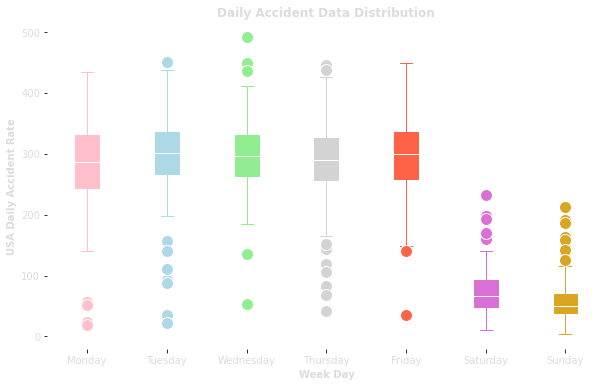

In [38]:
upper_outlier={}
lower_outlier={}
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey','tomato','orchid','goldenrod']    # colors for plot
for i in range(0,7):                                
    data=daily_accidents[i]['Date'] 
    upperq =daily_stats[i]['75%']
    lowerq =daily_stats[i]['25%']
    iqr = upperq - lowerq                                    # iqr                      
    upper_outlier[i]=daily_accidents[i].loc[data>upperq+iqr*1.5]  # finding and storing all upper outliers
    lower_outlier[i]=daily_accidents[i].loc[data<lowerq-iqr*1.5]  # finding and storing all lower outliers
    # printing results
    print('\n\033[1m\033[4m', i,'\033[0m \n','\033[1miqr=\033[0m',iqr)
    if upper_outlier[i].empty:
        print('\033[1m UPPER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m UPPER OUTLIER \033[0m ','\n',upper_outlier)
    if lower_outlier[i].empty:
        print('\033[1m LOWER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m LOWER OUTLIER \033[0m ','\n',lower_outlier)
    print("-"*40)
    c=colors[i]                             # color for each regiment chart
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# "Data-Ink Ratio" applied
    plot1.boxplot(data, 
                  patch_artist=True, widths=0.3,labels=[i],
                  boxprops=dict(facecolor=c, color=c),
                  capprops=dict(color=c),
                  whiskerprops=dict(color=c),
                  flierprops=dict(marker='o',markerfacecolor=c,markeredgecolor="white",markersize=12, label="shown"),
                  medianprops=dict(color='white'),
                  positions=[i])

plt.title("Daily Accident Data Distribution", fontweight="bold", color=color_t)    
plt.xlabel('Week Day', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,7),weekdays, color=color_t,fontsize=10)
#plt.label()
plt.show


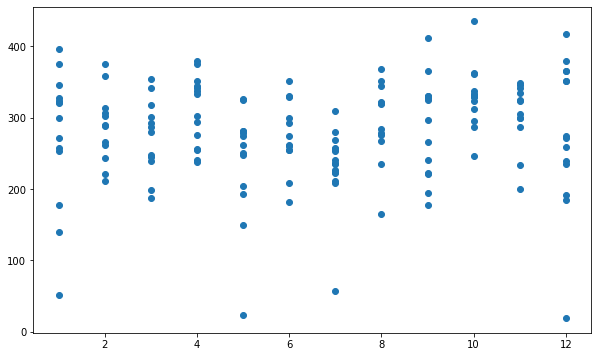

In [39]:
plot2=plt.scatter(daily_accidents[0]['Month'],daily_accidents[0]['Date'])

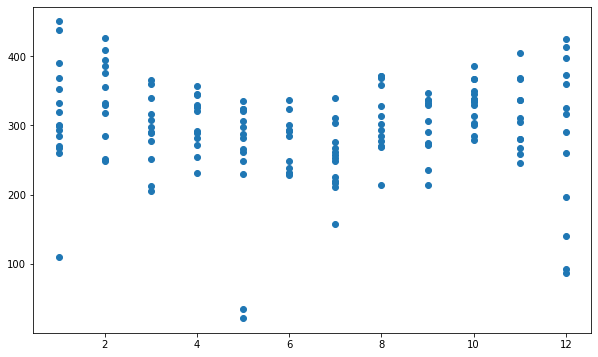

In [40]:
y=daily_accidents[1]['Date']
plot2=plt.scatter(daily_accidents[1]['Month'],y)

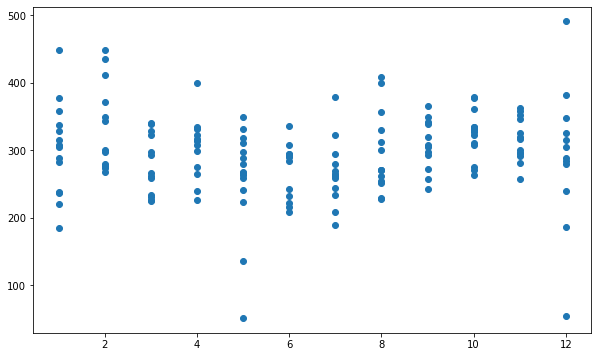

In [41]:
plot2=plt.scatter(daily_accidents[2]['Month'],daily_accidents[2]['Date'] )

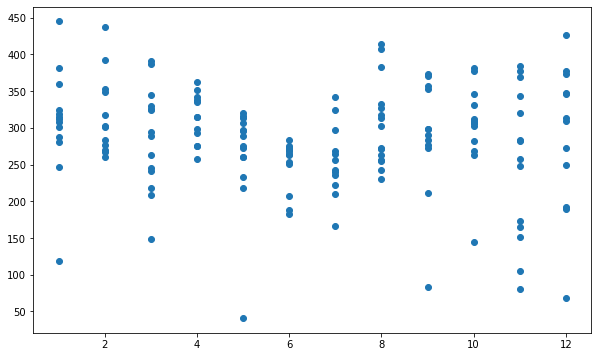

In [42]:
plot2=plt.scatter(daily_accidents[3]['Month'],daily_accidents[3]['Date'] )

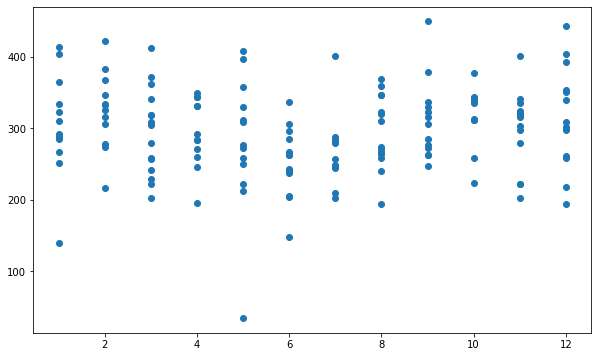

In [44]:
plot2=plt.scatter(daily_accidents[4]['Month'],daily_accidents[4]['Date'] )

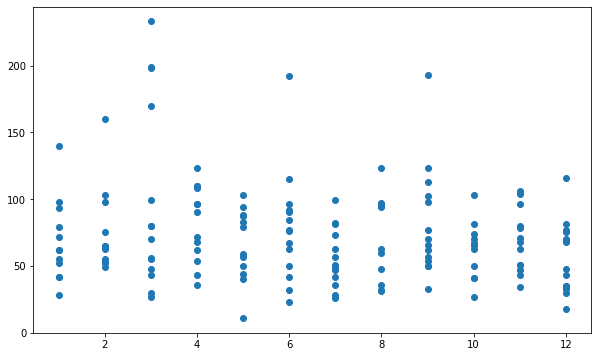

In [45]:
plot2=plt.scatter(daily_accidents[5]['Month'],daily_accidents[5]['Date'] )

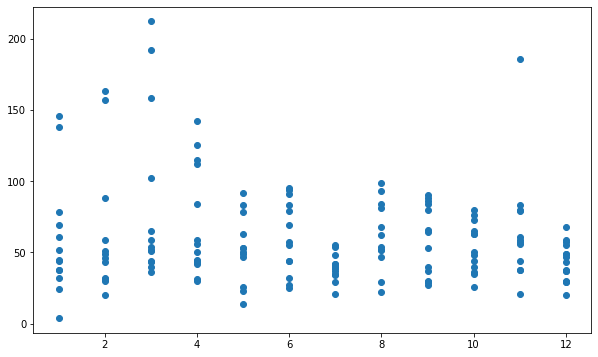

In [46]:
plot2=plt.scatter(daily_accidents[6]['Month'],daily_accidents[6]['Date'] )

In [47]:
upper_outlier

{0: Empty DataFrame
 Columns: [Date, Year, Month]
 Index: [],
 1:             Date  Year  Month
 Date                         
 2017-01-17   450  2017      1,
 2:             Date  Year  Month
 Date                         
 2017-01-11   448  2017      1
 2017-02-01   449  2017      2
 2017-12-06   491  2017     12
 2018-02-21   436  2018      2,
 3:             Date  Year  Month
 Date                         
 2017-01-12   445  2017      1
 2018-02-22   437  2018      2,
 4: Empty DataFrame
 Columns: [Date, Year, Month]
 Index: [],
 5:             Date  Year  Month
 Date                         
 2017-02-25   160  2017      2
 2017-03-04   170  2017      3
 2017-03-11   199  2017      3
 2017-03-18   233  2017      3
 2017-03-25   198  2017      3
 2018-06-16   192  2018      6
 2019-09-07   193  2019      9,
 6:             Date  Year  Month
 Date                         
 2017-01-15   138  2017      1
 2017-01-29   146  2017      1
 2017-02-05   163  2017      2
 2017-02-26   157  2

In [49]:
lower_outlier[0]

,Date,Year,Month
Date,,,
2017-05-29,23,2017,5
2017-07-31,57,2017,7
2017-12-25,19,2017,12
2018-01-01,51,2018,1


In [93]:
zip_df=traffic_df.groupby(['Zipcode']).agg({'ID':'count'}).sort_values('ID',ascending=False)
zip_df

,ID
Zipcode,
75243,2666
75207,2216
78753,2047
75228,1918
78744,1917
...,...
77056-6642,1
77056-6641,1
77056-6618,1


In [110]:
max_zip='75243'
mzip_traffic=traffic_df[traffic_df['Zipcode']==max_zip]
mzip_traffic_weekday=mzip_traffic[(mzip_traffic['Weekday']!=6)&(mzip_traffic['Weekday']!=5)]


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Date,Weekday
29,A-267741,MapQuest,201.0,2,2017-01-02 16:06:02,2017-01-02 17:05:35,32.900597,-96.717712,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2017,2017-01-02,0
42,A-267754,MapQuest,201.0,2,2017-01-02 17:16:47,2017-01-02 17:46:27,32.934750,-96.752365,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2017,2017-01-02,0
413,A-268125,MapQuest,201.0,3,2017-01-04 13:29:14,2017-01-04 14:30:00,32.924236,-96.763657,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2017,2017-01-04,2
675,A-268387,MapQuest,201.0,2,2017-01-05 14:56:58,2017-01-05 15:55:00,32.909470,-96.717773,NaN,NaN,...,False,True,False,Day,Day,Day,Day,2017,2017-01-05,3
959,A-268671,MapQuest,201.0,3,2017-01-06 15:07:27,2017-01-06 16:06:49,32.916962,-96.743477,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2017,2017-01-06,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247934,A-3505045,Bing,NaN,3,2019-08-05 06:33:57,2019-08-05 07:03:27,32.898510,-96.714810,32.902990,-96.721710,...,False,False,False,Night,Day,Day,Day,2019,2019-08-05,0
248086,A-3508249,Bing,NaN,3,2019-08-12 08:20:28,2019-08-12 08:49:32,32.917220,-96.766630,32.922707,-96.764567,...,False,False,False,Day,Day,Day,Day,2019,2019-08-12,0
248217,A-3511426,Bing,NaN,3,2019-08-19 08:15:54,2019-08-19 08:44:16,32.912350,-96.736670,32.920540,-96.749340,...,False,False,False,Day,Day,Day,Day,2019,2019-08-19,0
248236,A-3511448,Bing,NaN,2,2019-08-19 18:17:00,2019-08-19 18:46:45,32.904380,-96.768870,32.906030,-96.768850,...,False,False,False,Day,Day,Day,Day,2019,2019-08-19,0


In [111]:
zip_temp=mzip_traffic_weekday.groupby(['Date']).agg({'Temperature(F)':['mean','max','min'], 'ID':'count','Weekday':'mean'})

In [112]:
zip_temp

Temperature(F)                ID Weekday
                     mean   max   min count    mean
Date                                               
2017-01-02        70.7000  71.6  69.8     2       0
2017-01-04        35.6000  35.6  35.6     1       2
2017-01-05        35.6000  35.6  35.6     2       3
2017-01-06        20.8375  23.0  19.4     8       4
2017-01-09        58.4000  62.6  51.8     3       0
...                   ...   ...   ...   ...     ...
2019-12-23        55.5000  66.0  45.0     2       0
2019-12-25        66.0000  66.0  66.0     1       2
2019-12-27        66.2500  68.0  61.0     4       4
2019-12-30        37.0000  37.0  37.0     1       0
2019-12-31        38.0000  46.0  34.0     3       1

[703 rows x 5 columns]

In [117]:
zip_warm=zip_temp.loc[zip_temp[('Temperature(F)',  'mean')]>32]
zip_warm[(            'ID', 'count')].mean()

3.3222543352601157

In [118]:
zip_freez=zip_temp.loc[zip_temp[('Temperature(F)',  'mean')]<=32]
zip_freez[(            'ID', 'count')].mean()

4.1

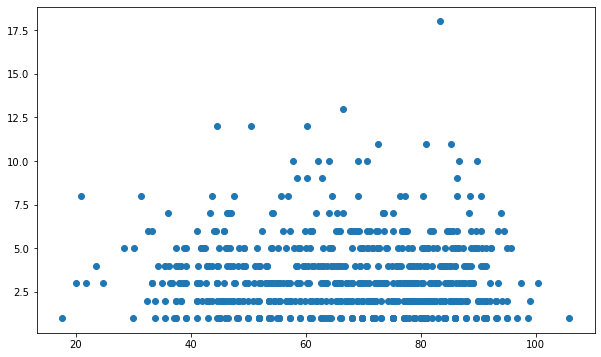

In [114]:
x=zip_temp[('Temperature(F)',  'mean')]
y=zip_temp[(            'ID', 'count')]
plot2=plt.scatter(x,y)

In [71]:
city_df=traffic_df.groupby(['City']).agg({'ID':'count'}).sort_values('ID',ascending=False)
city_df

,ID
City,
Houston,77682
Austin,47820
Dallas,45947
San Antonio,18820
El Paso,9286
...,...
Pilot Point,1
Harper,1
Canutillo,1


In [119]:
max_city='Houston'
mcity_traffic=traffic_df[traffic_df['City']==max_city]
mcity_traffic_weekday=mcity_traffic[(mcity_traffic['Weekday']!=6)&(mcity_traffic['Weekday']!=5)]

In [120]:
city_temp=mcity_traffic_weekday.groupby(['Date']).agg({'Temperature(F)':['mean','max','min'], 'ID':'count','Weekday':'mean'})

In [126]:
city_warm=city_temp.loc[city_temp[('Temperature(F)',  'mean')]>40]
city_warm[(            'ID', 'count')].mean()

91.91514360313316

In [127]:
city_freez=city_temp.loc[city_temp[('Temperature(F)',  'mean')]<=40]
city_freez[(            'ID', 'count')].mean()

80.0

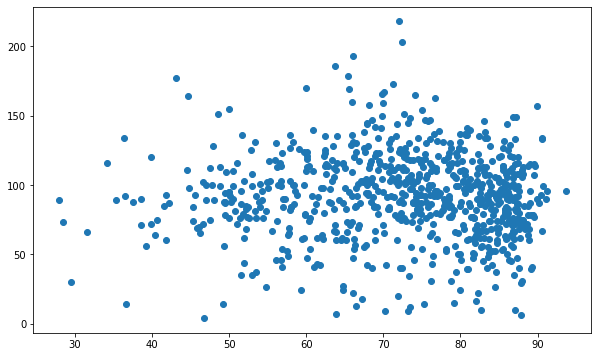

In [128]:
x=city_temp[('Temperature(F)',  'mean')]
y=city_temp[(            'ID', 'count')]
plot2=plt.scatter(x,y)